In [2]:
!pip install keras

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy
import pandas
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/Graduate%20Admission%202/Admission_Predict.csv")

#changing names because previous names are little bit confusing
df=df.rename(index=str, columns={"GRE Score": "GRE", "TOEFL Score": "TOEFL", "Chance of Admit ": "Admission_Chance"})
df.head(10)

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [5]:
df = df.drop("Serial No.",axis=1)
df.shape

(400, 8)

In [6]:
print(df.isna().sum(),"\n",df.isnull().sum())

GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admission_Chance     0
dtype: int64 
 GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admission_Chance     0
dtype: int64


In [7]:
admit=np.asarray(df["Admission_Chance"])
len(np.unique(admit))
# different values in the coloum [ unique chance to predict]

60

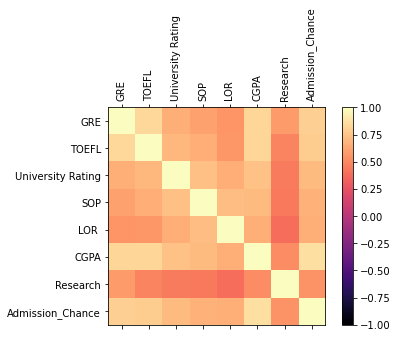

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='magma', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

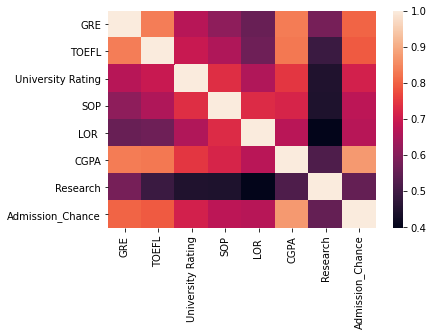

In [9]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

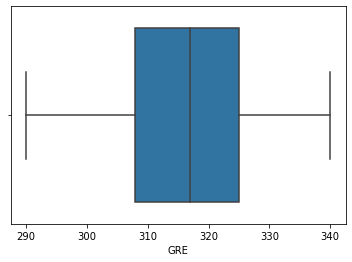

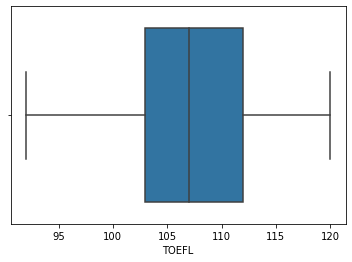

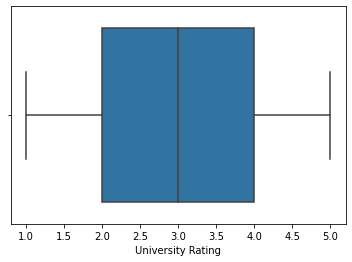

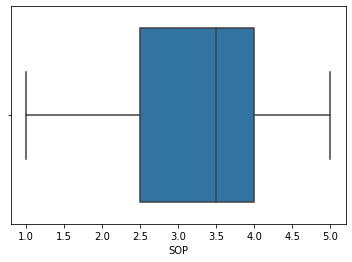

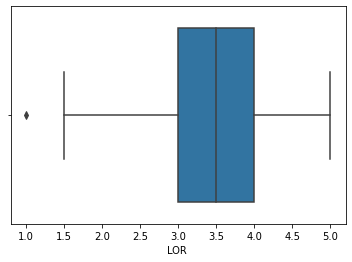

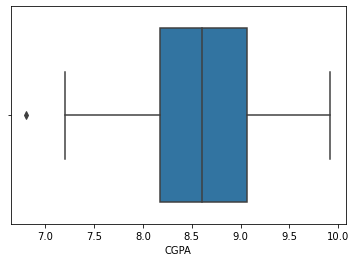

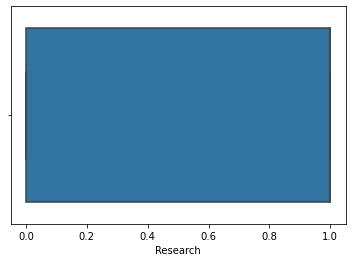

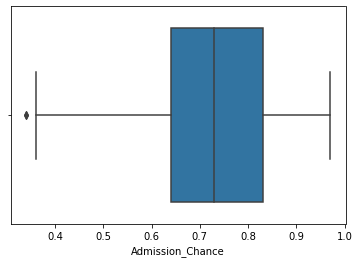

In [12]:
for column in df:
    plt.figure()
    sns.boxplot(x=df[column])

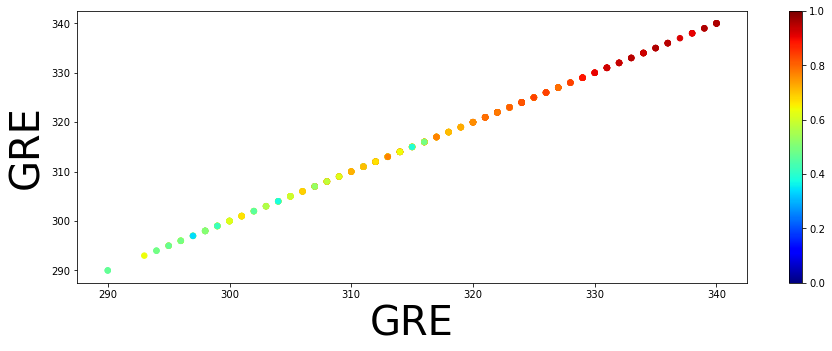

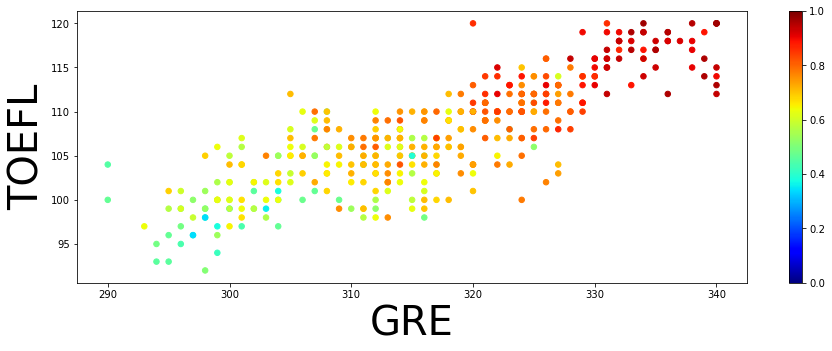

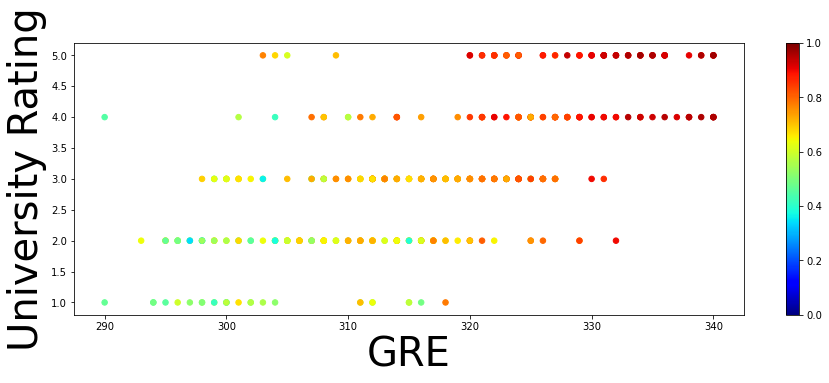

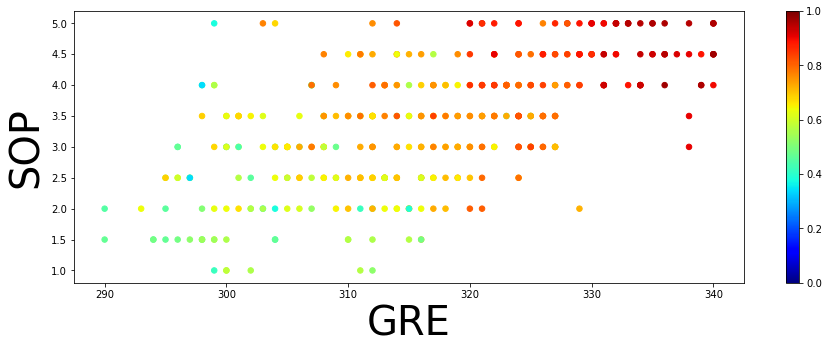

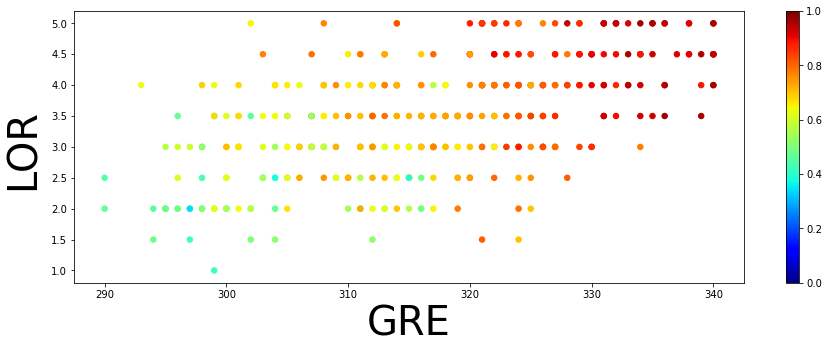

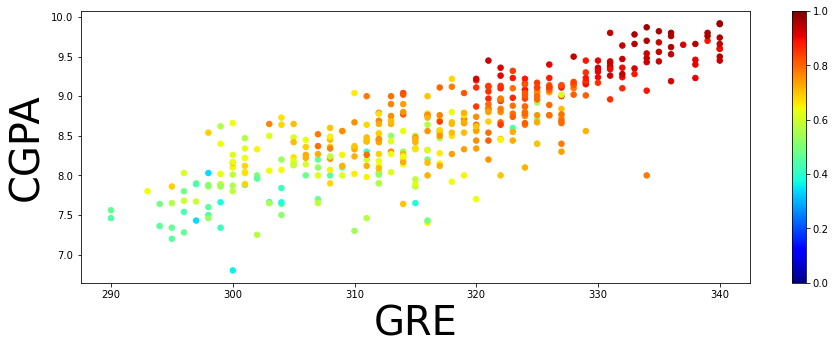

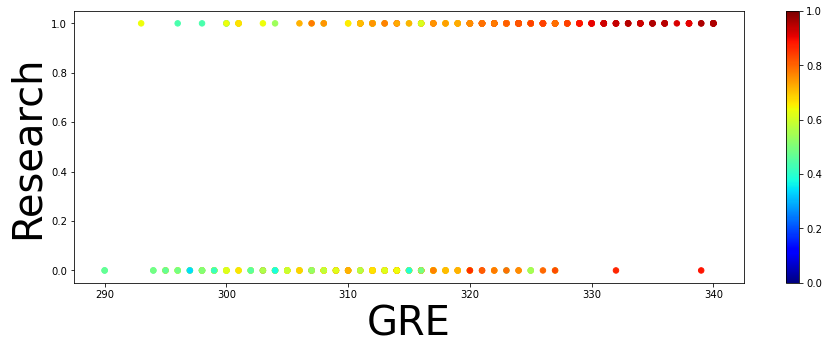

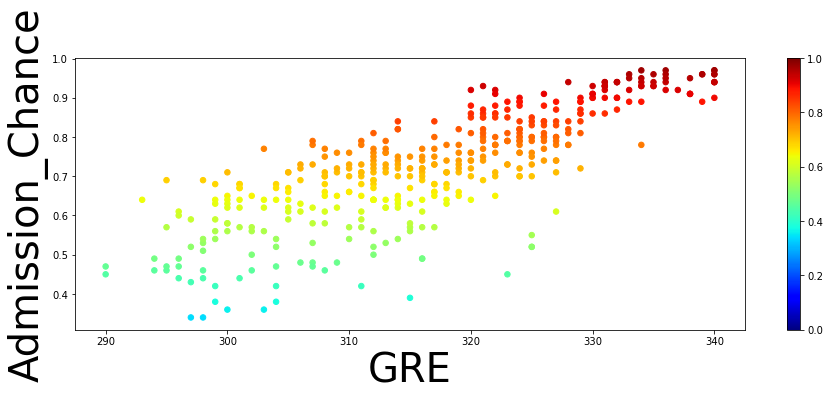

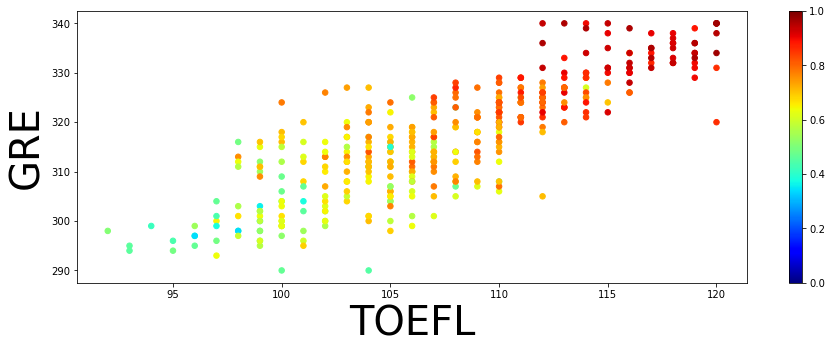

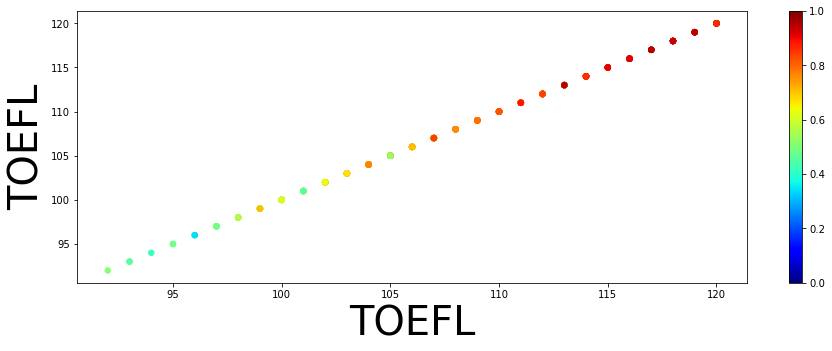

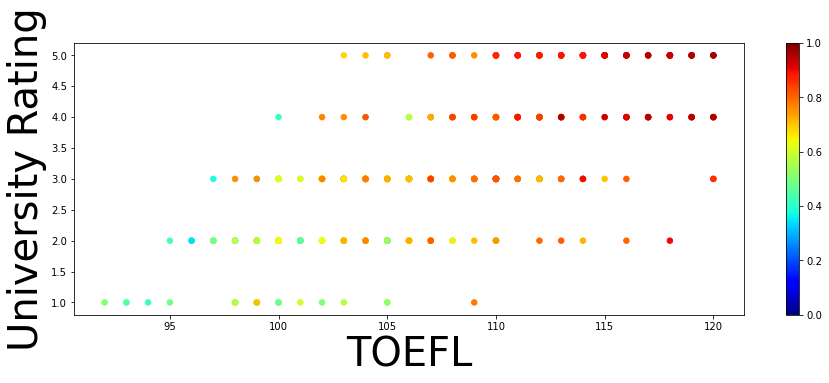

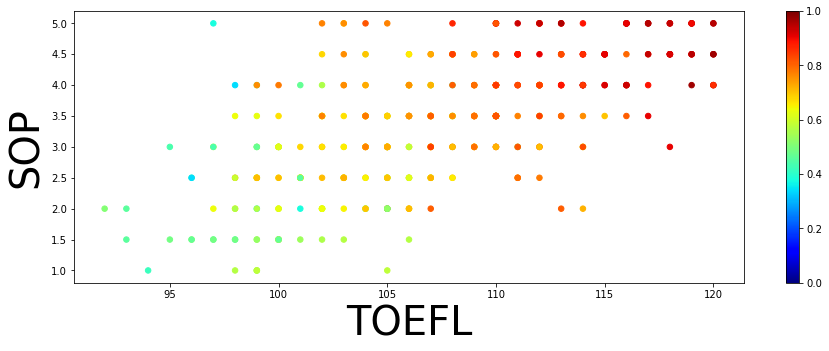

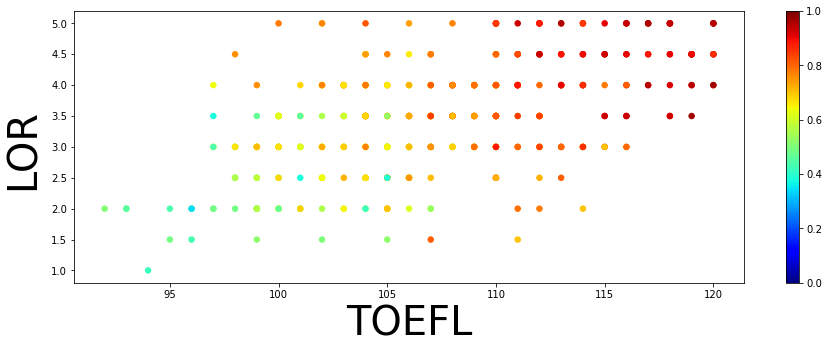

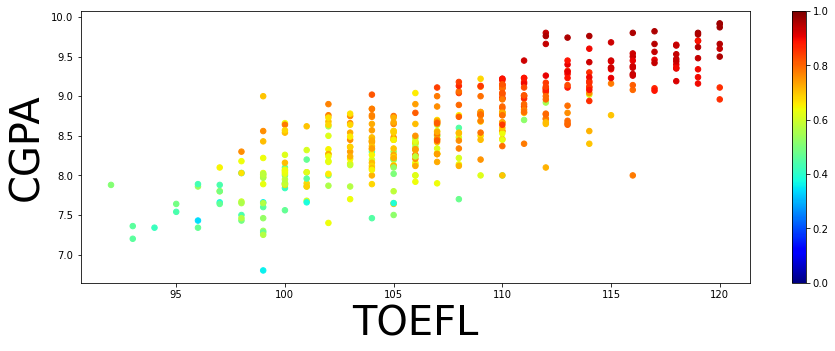

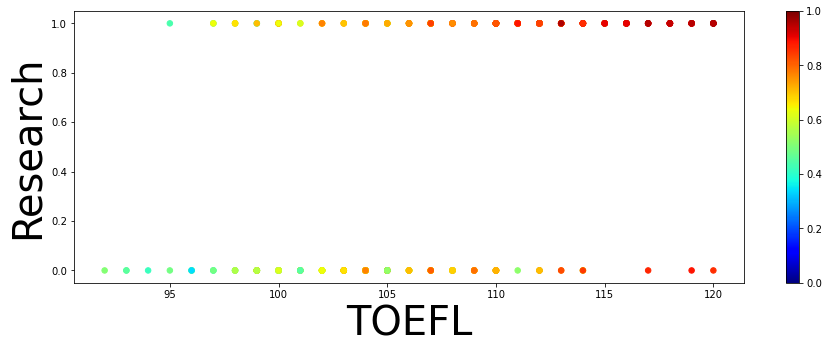

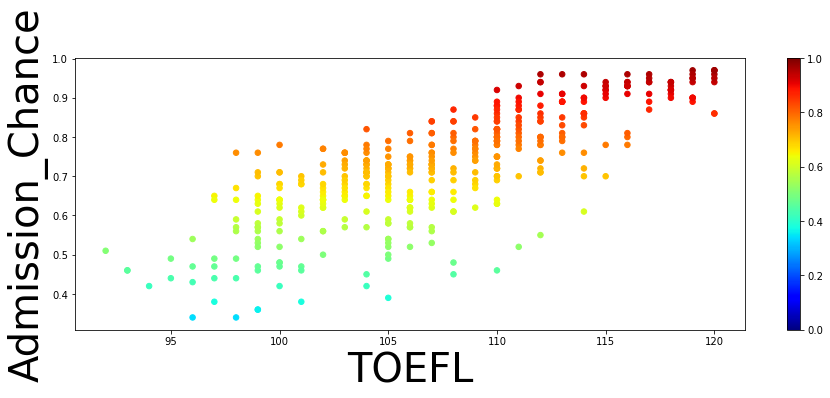

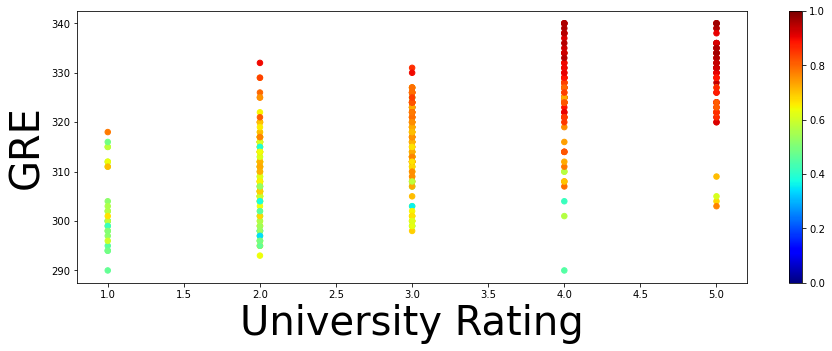

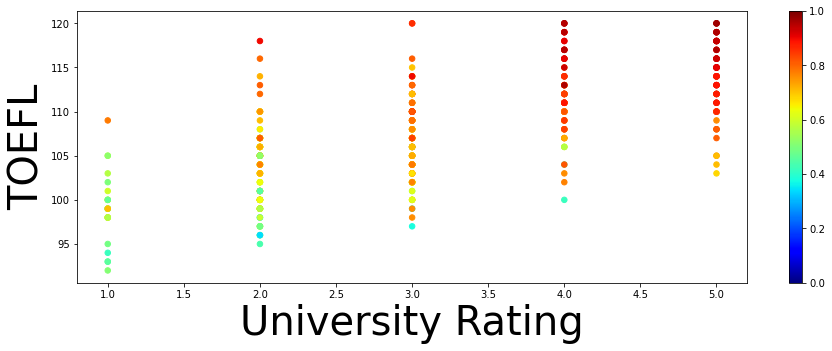

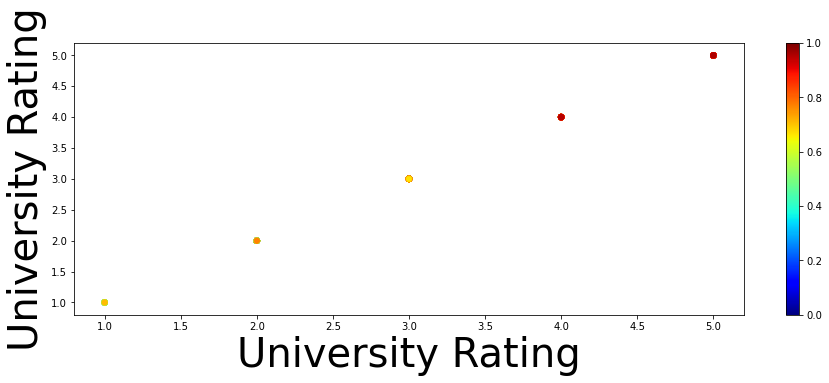

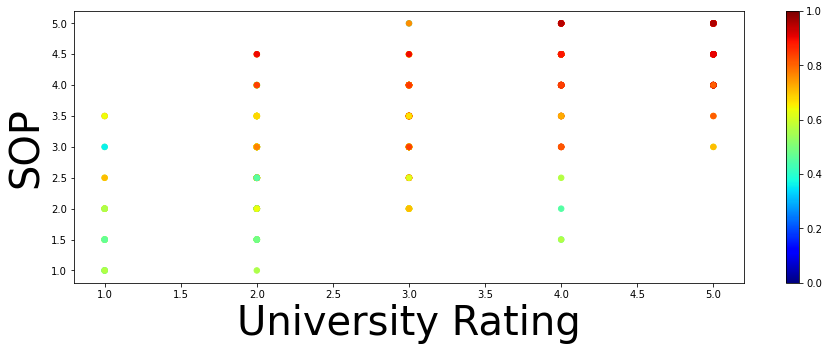

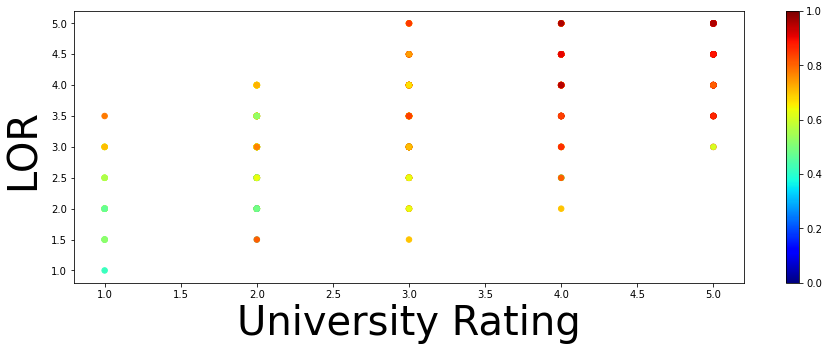

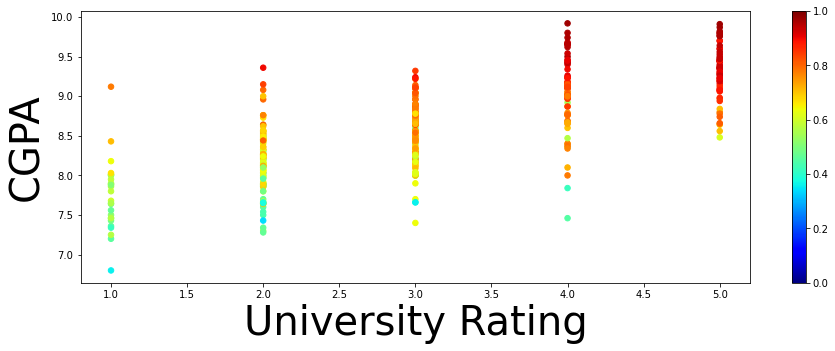

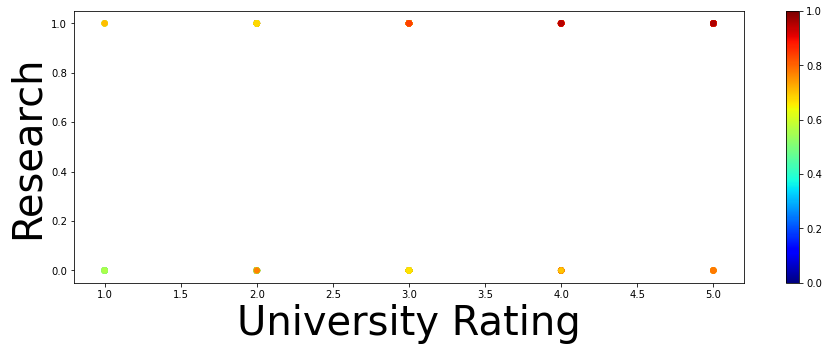

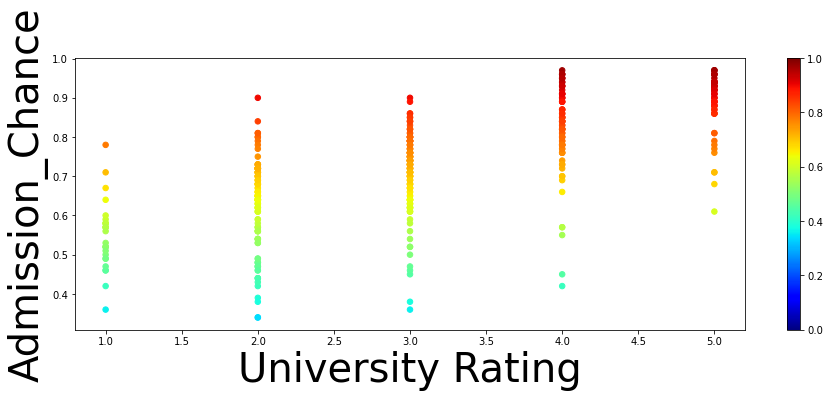

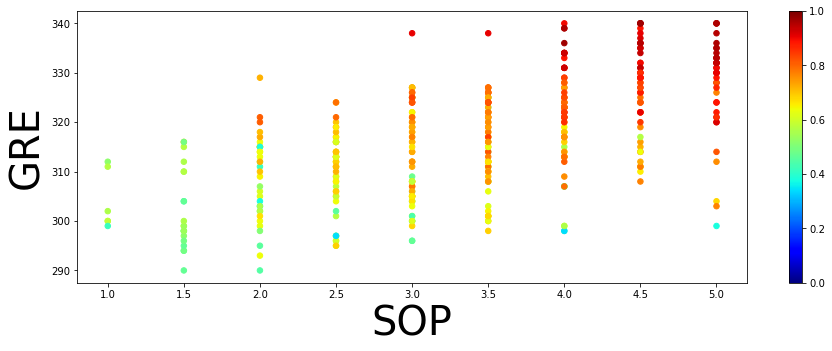

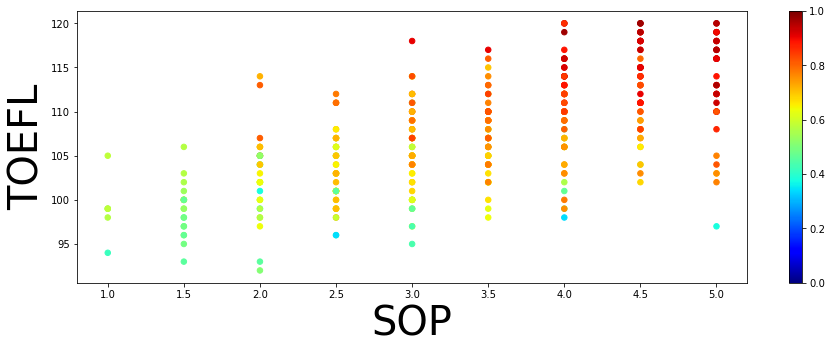

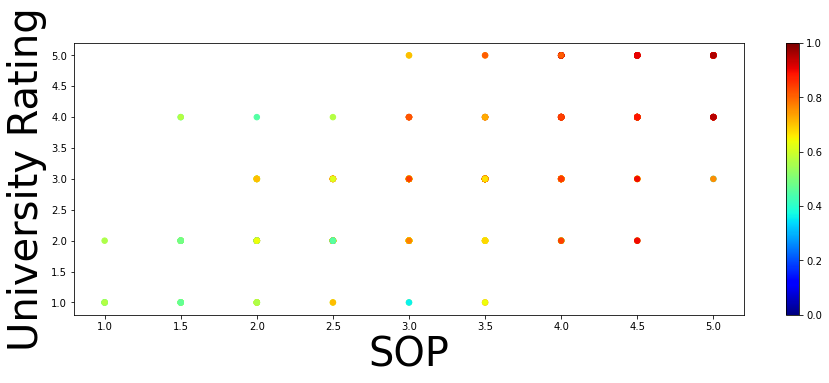

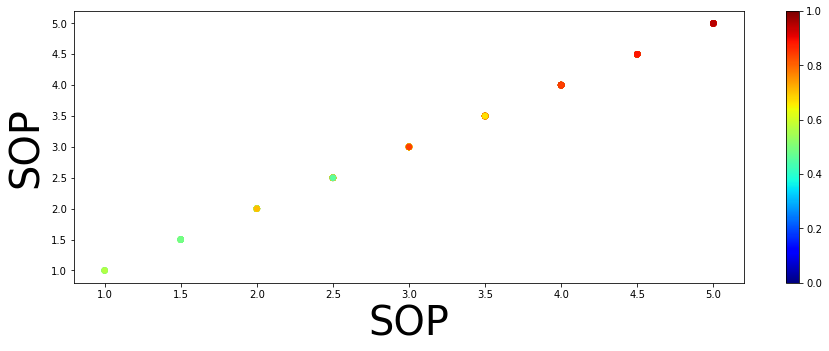

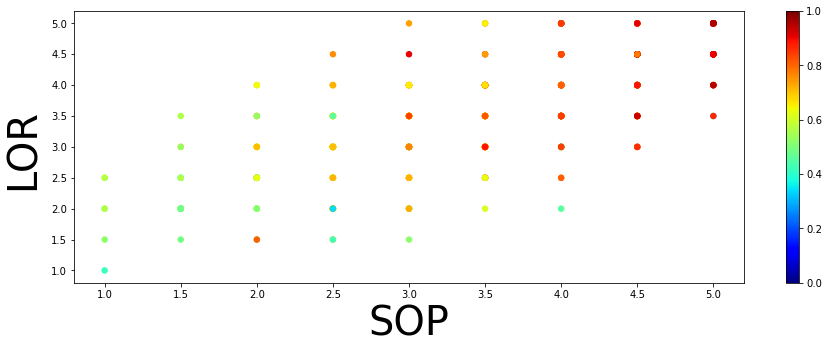

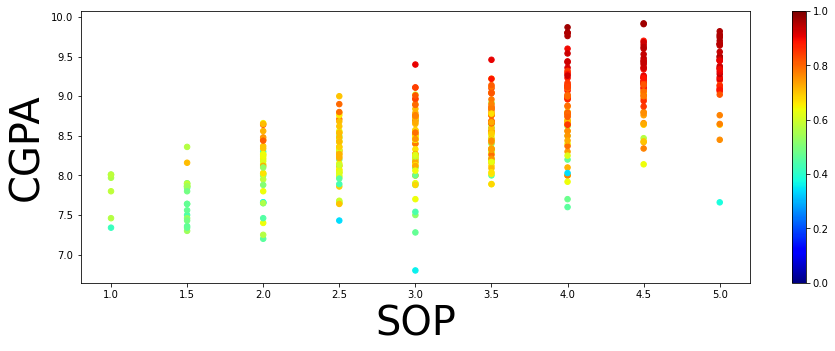

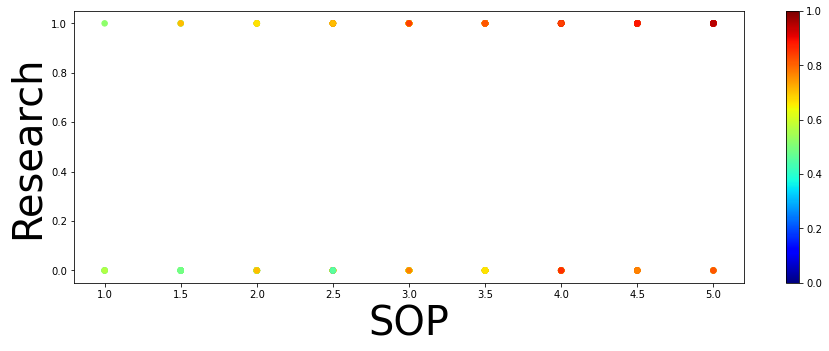

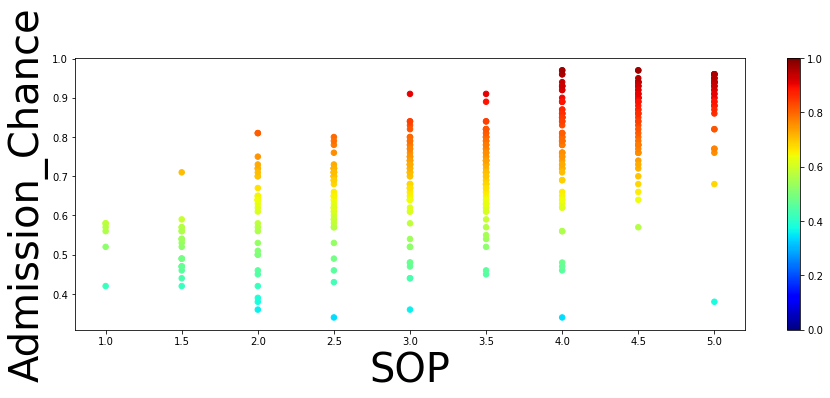

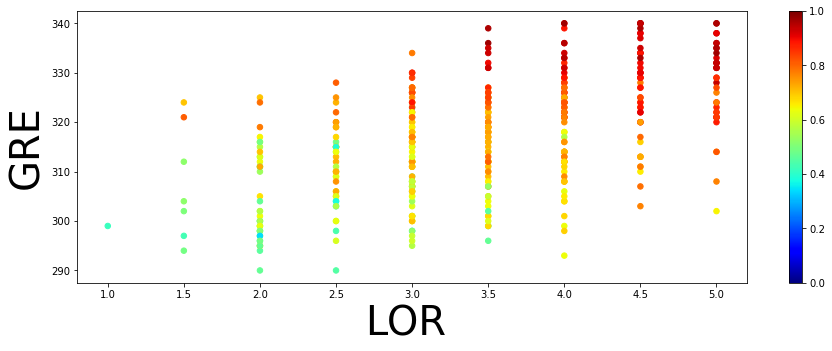

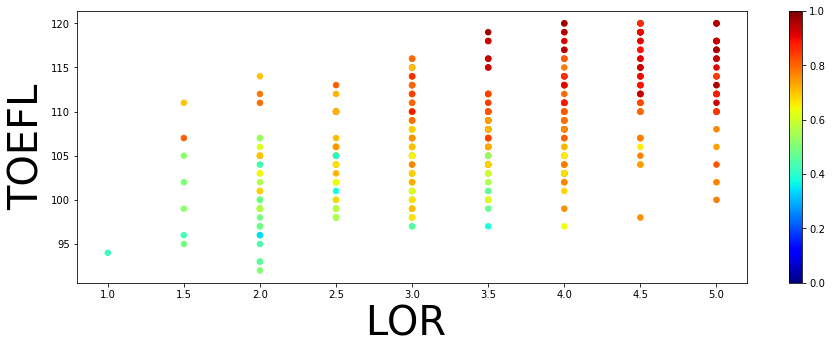

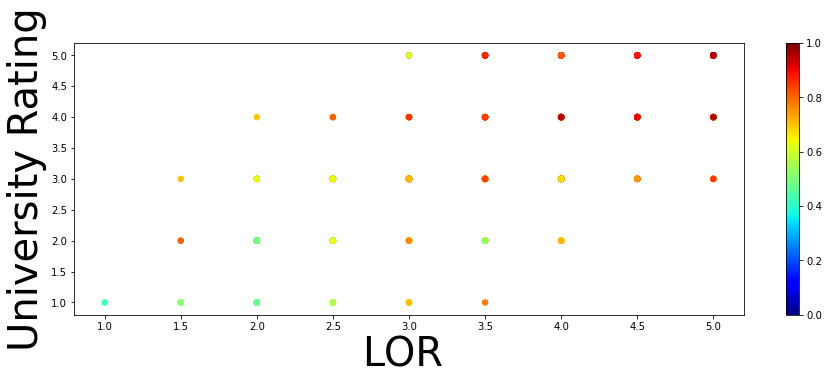

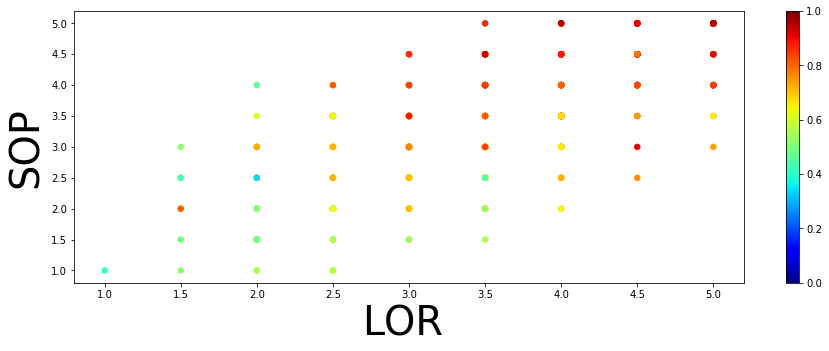

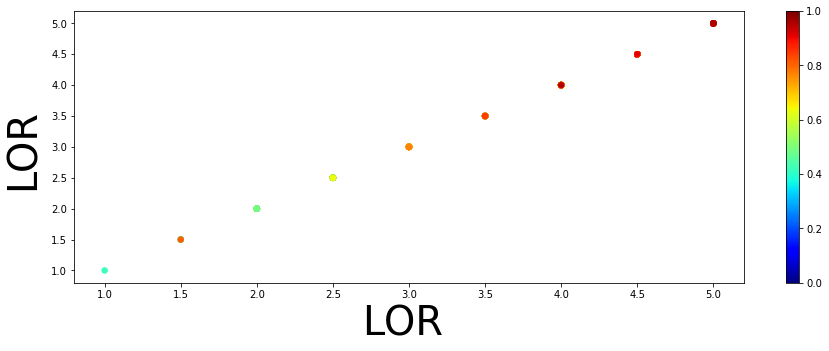

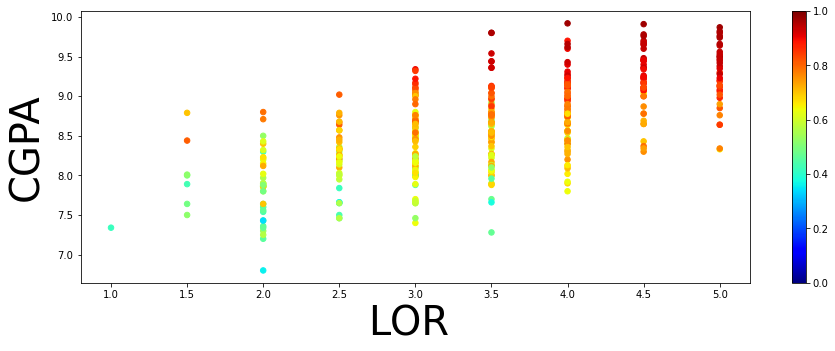

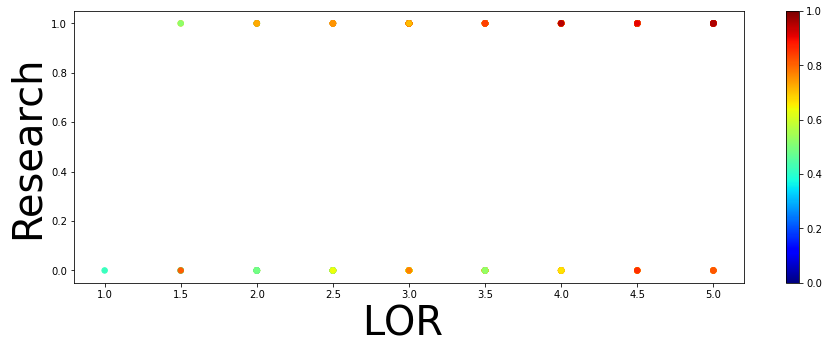

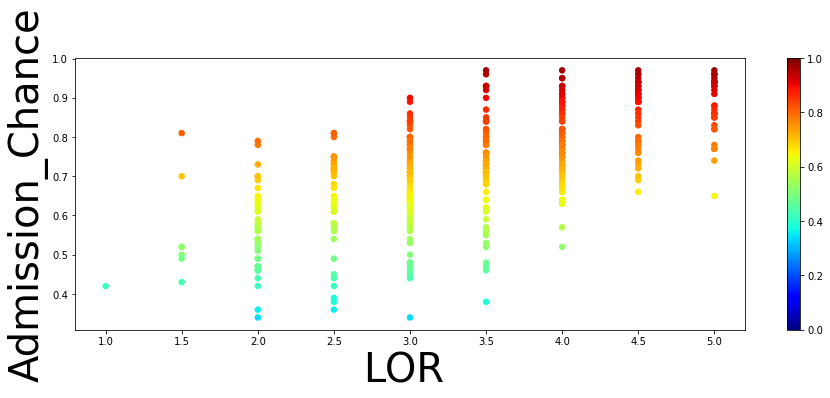

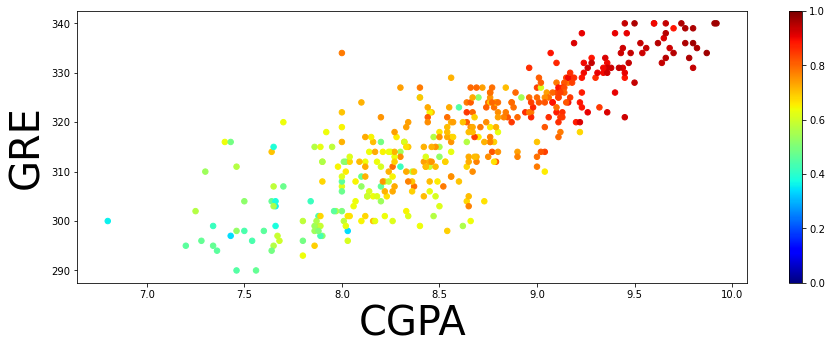

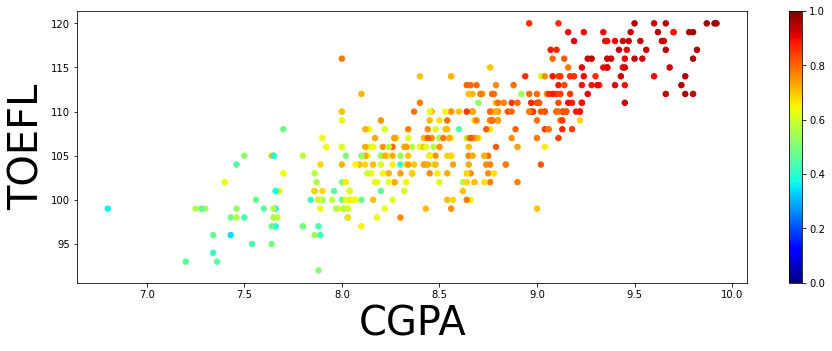

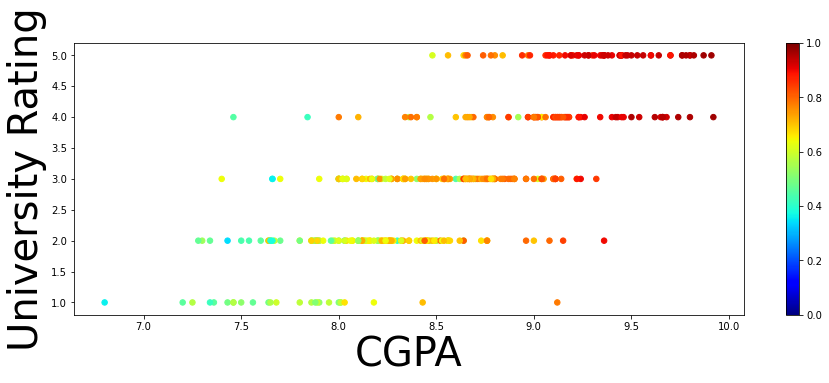

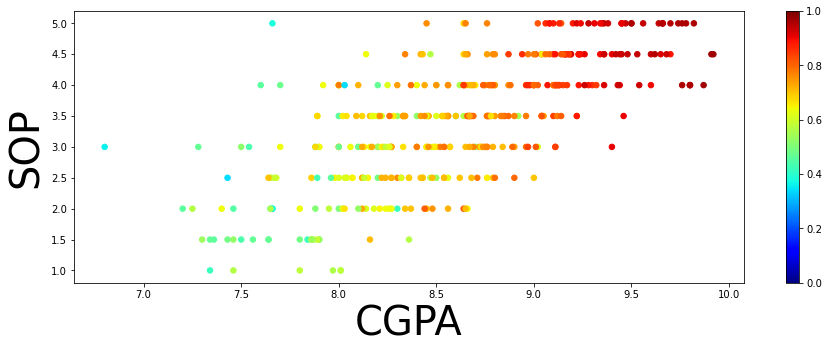

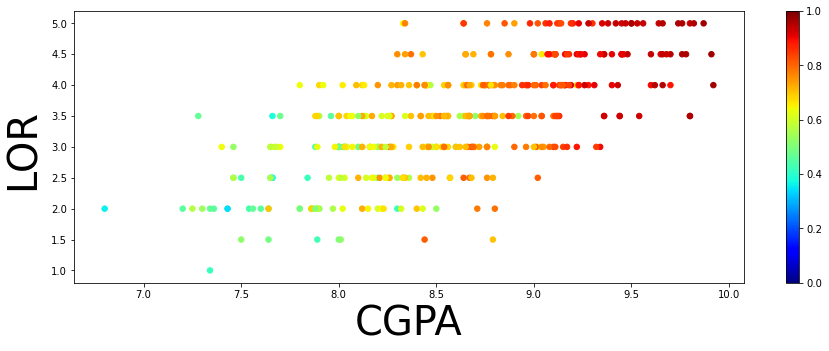

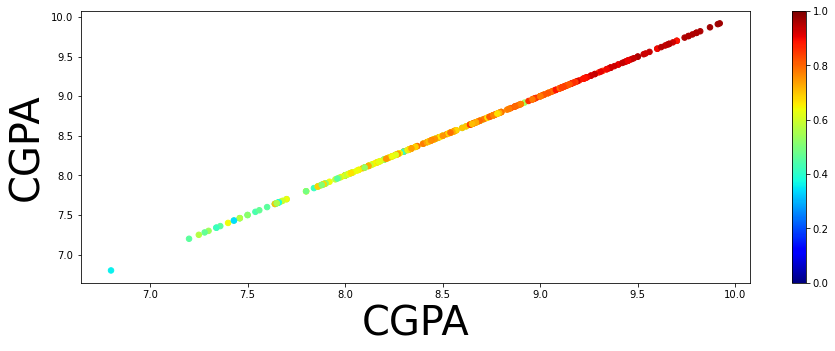

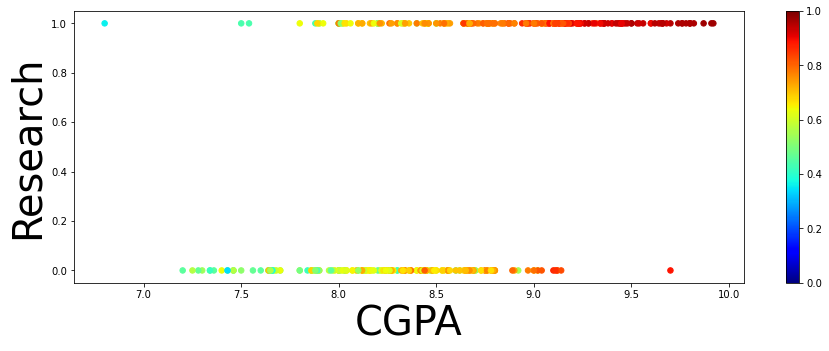

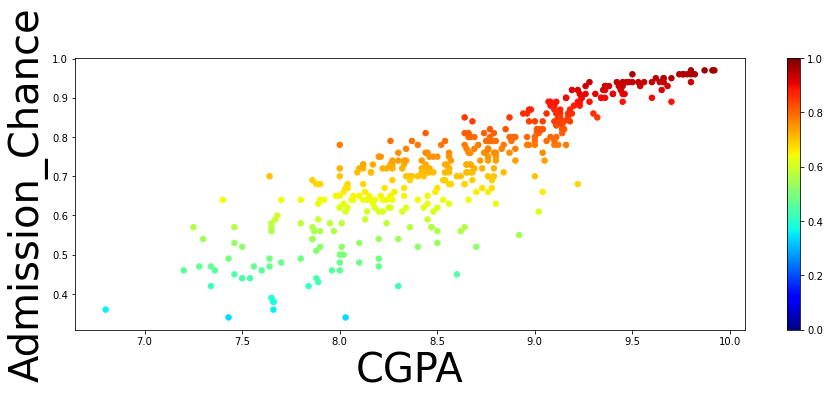

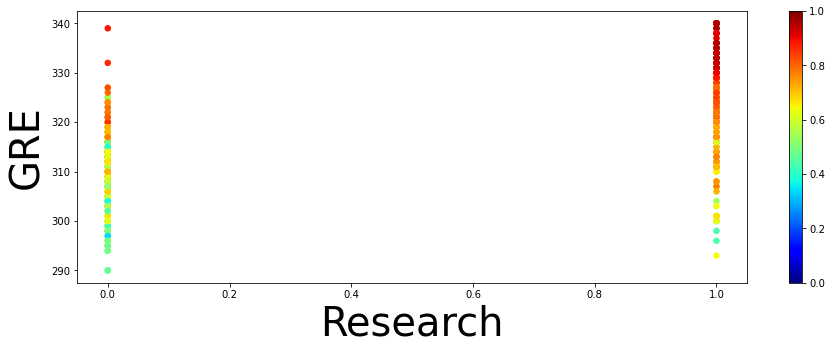

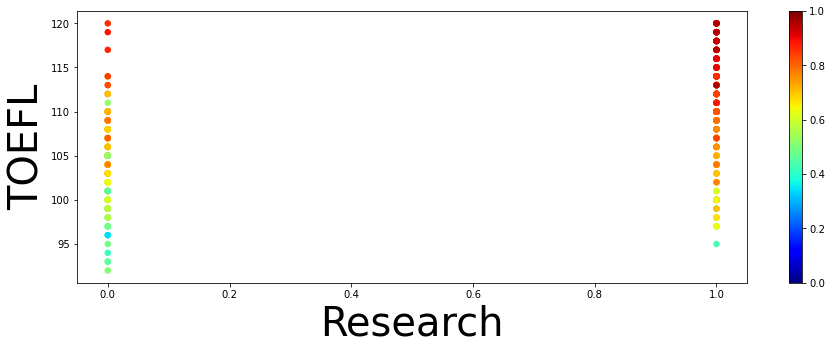

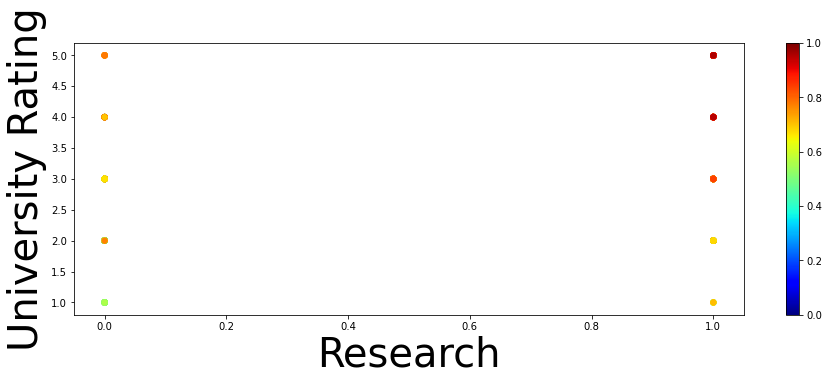

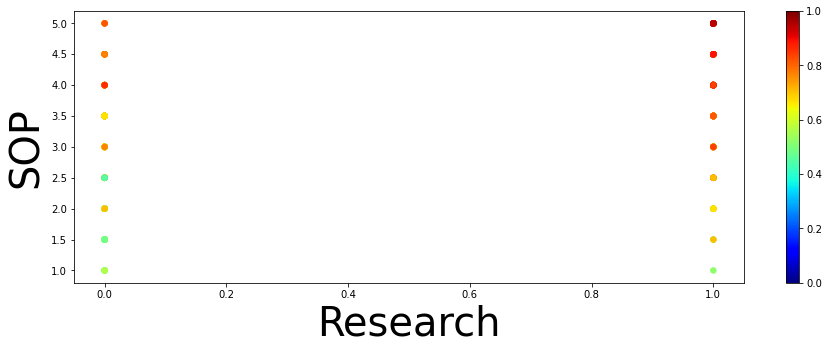

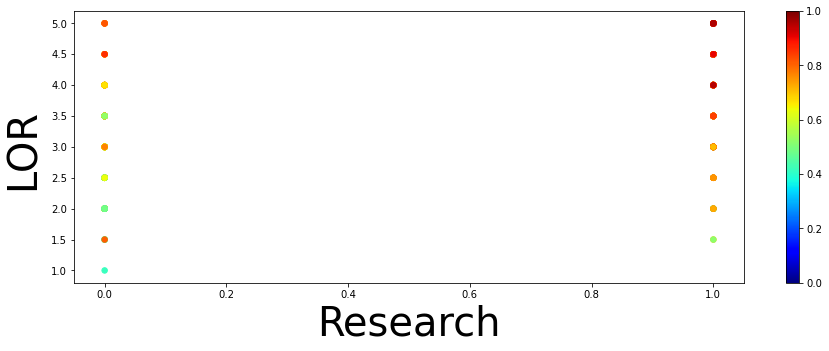

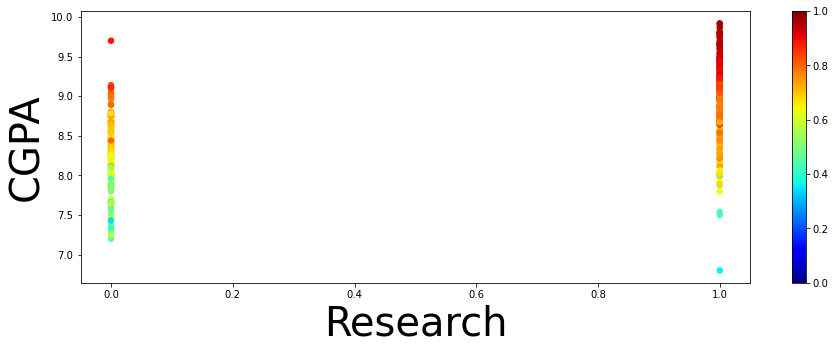

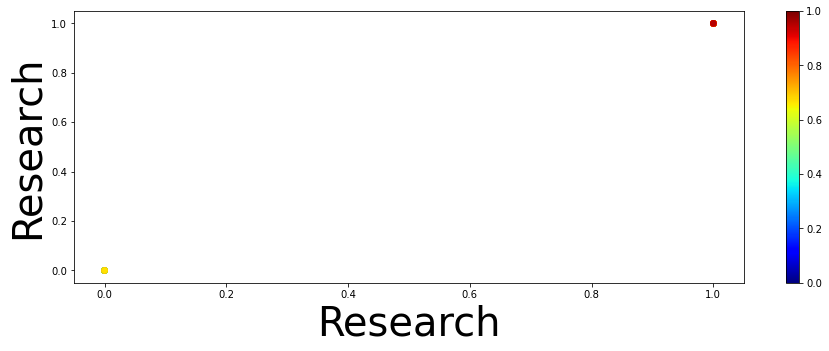

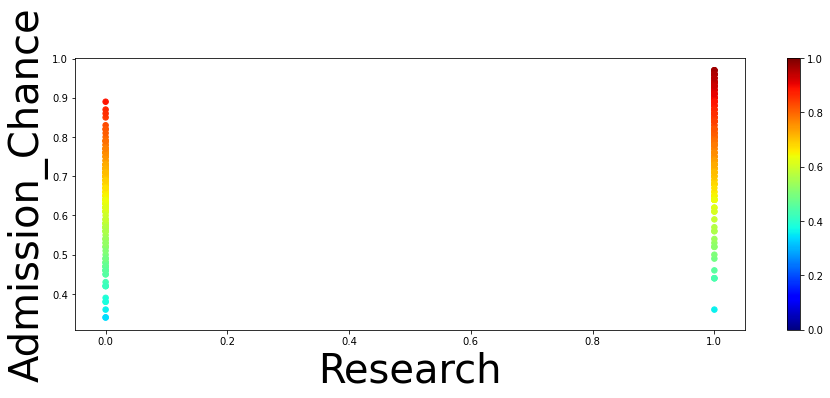

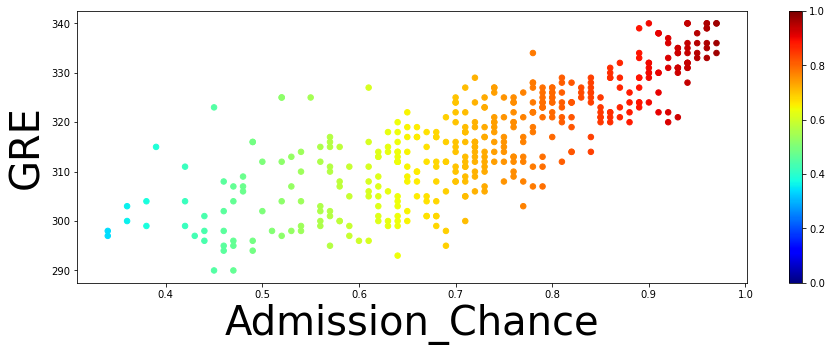

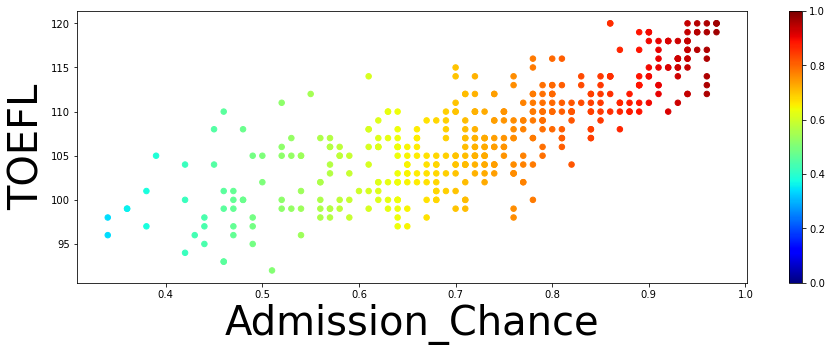

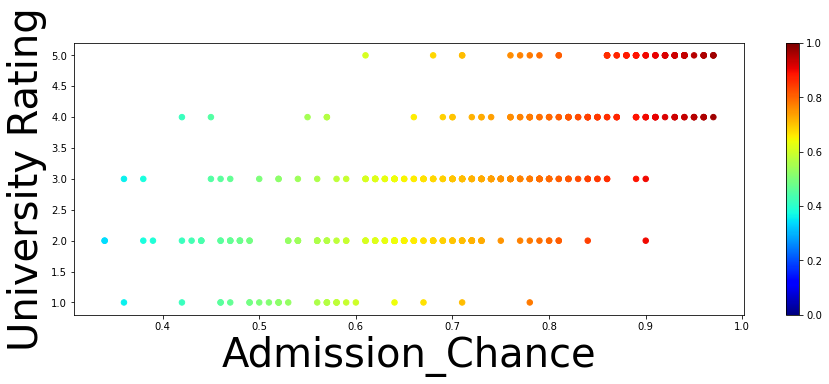

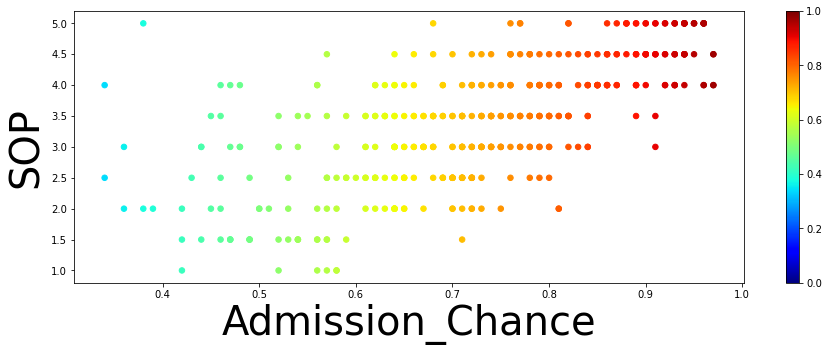

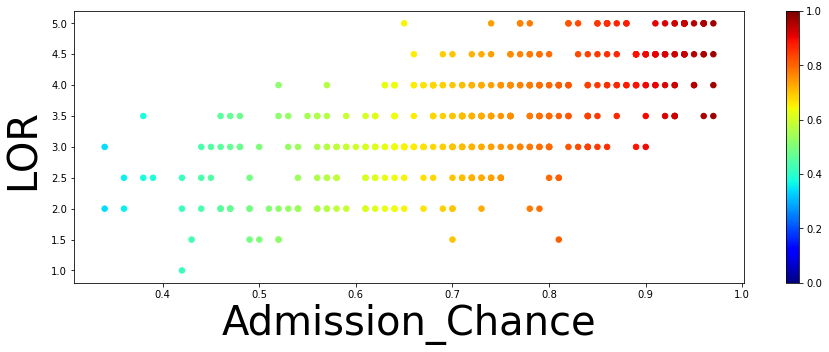

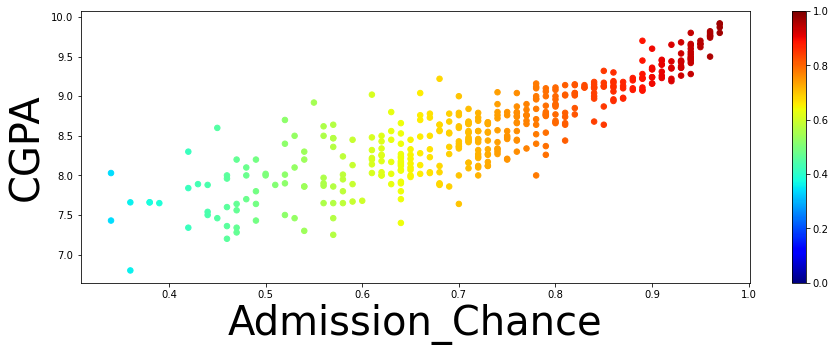

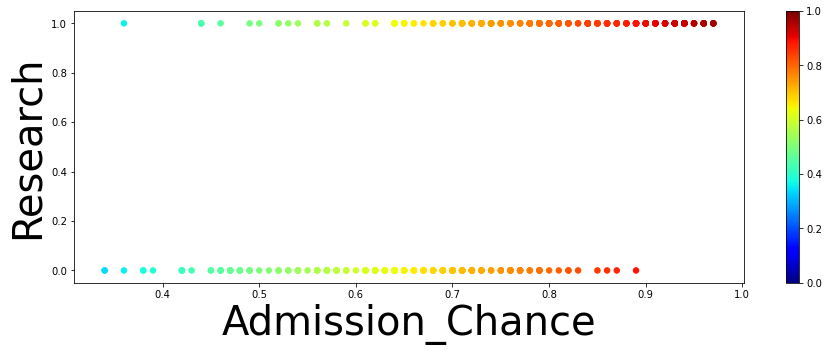

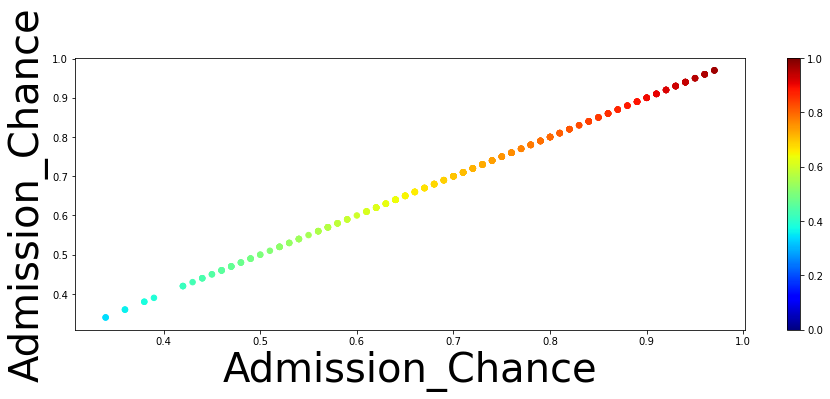

array([0.67782122, 0.67419341, 0.77205341, 0.58079299, 0.710947  ,
       0.56319444, 0.69173217, 0.60582004, 0.88920363, 0.94380105,
       0.48322971, 0.90188556, 0.69258145, 0.38132759, 0.86441774,
       0.58944878, 0.59399132, 0.82099914, 0.53887939, 0.72129392,
       0.88941717, 0.85630534, 0.63271101, 0.38173952, 0.77971278,
       0.5388914 , 0.43122416, 0.61028443, 0.90301037, 0.61968149,
       0.60137782, 0.72453938, 0.72873219, 0.50937058, 0.78232351,
       0.76259172, 0.61210027, 0.87581435, 0.59686796, 0.96065722,
       0.70766424, 0.64429642, 0.68220912, 0.80694328, 0.83400471,
       0.61823383, 0.50828207, 0.66868139, 0.56834943, 0.56105499,
       0.65244357, 0.80214151, 0.61965423, 0.89122082, 0.70724376,
       0.74440204, 0.67349938, 0.71496002, 0.75117435, 0.83565374,
       0.77217495, 0.40692332, 0.60400948, 0.4635542 , 0.84758485,
       0.82946111, 0.72144873, 0.88231   , 0.76686964, 0.74392918,
       0.55497157, 0.83577771, 0.83735972, 0.55981958, 0.95935

In [13]:
for column_1st in df:
    for coloum_2nd in df:
        jet=plt.get_cmap('jet')
        plt.figure(figsize=(15,5))
        plt.scatter(df[column_1st], df[coloum_2nd], s=30, c=df['Admission_Chance'], vmin=0, vmax=1, cmap=jet)
        plt.xlabel(column_1st,fontsize=40)
        plt.ylabel(coloum_2nd,fontsize=40)
        plt.colorbar()
        plt.show()
X=np.asarray(df.drop("Admission_Chance",axis=1))
Y=np.asarray(df["Admission_Chance"])
y = Y
X_train, X_test, y_train, y_test = train_test_split(
     X,Y, test_size=0.2, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
lr_model = regr.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_pred

In [14]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
lr_model = regr.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_pred

array([0.67782122, 0.67419341, 0.77205341, 0.58079299, 0.710947  ,
       0.56319444, 0.69173217, 0.60582004, 0.88920363, 0.94380105,
       0.48322971, 0.90188556, 0.69258145, 0.38132759, 0.86441774,
       0.58944878, 0.59399132, 0.82099914, 0.53887939, 0.72129392,
       0.88941717, 0.85630534, 0.63271101, 0.38173952, 0.77971278,
       0.5388914 , 0.43122416, 0.61028443, 0.90301037, 0.61968149,
       0.60137782, 0.72453938, 0.72873219, 0.50937058, 0.78232351,
       0.76259172, 0.61210027, 0.87581435, 0.59686796, 0.96065722,
       0.70766424, 0.64429642, 0.68220912, 0.80694328, 0.83400471,
       0.61823383, 0.50828207, 0.66868139, 0.56834943, 0.56105499,
       0.65244357, 0.80214151, 0.61965423, 0.89122082, 0.70724376,
       0.74440204, 0.67349938, 0.71496002, 0.75117435, 0.83565374,
       0.77217495, 0.40692332, 0.60400948, 0.4635542 , 0.84758485,
       0.82946111, 0.72144873, 0.88231   , 0.76686964, 0.74392918,
       0.55497157, 0.83577771, 0.83735972, 0.55981958, 0.95935

In [15]:
def baseline_model():
    # create model
    model = Sequential()
    
    
    
    model.add(Dense(16, input_dim=7, activation='relu'))
    
    
    model.add(Dense(8, input_dim=7, activation='relu'))
    
    
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model